In [83]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import time
import matplotlib.pyplot as plt

In [84]:
def get_winners (link):
    page = requests.get(link)
    soup = BS(page.content, 'html.parser')
    idk=soup.select('div[class="round"]')
    i=0
    k=0
    winners=[]
    for thing in list(range(1,100)):
        if k == 22:
            break
        elif k == 0 or k== 1 or k==2 or k==3 or k==5 or k==6 or k==7 or k==8 or k==10 or k==11 or k==12 or k==13 or k==15 or k==16 or k==17 or k==18 or k==20 or k==21:
            try:
                winners.append(idk[k].select('div')[i].select('div[class="winner"]')[0].select('span')[0].string)
                i+=3
            except:
                i=0
                k+=1
                continue
        else:
            i=0
            k+=1
            continue
    winners_int=[]
    for thing in winners:
        winners_int.append(int(thing))
    return winners_int
    

In [85]:
#function for getting the teams
#gets the teams that played each other all together
def get_teams (link,k):
    page = requests.get(link)
    soup = BS(page.content, 'html.parser')
    idk=soup.select('div[class="round"]')
    i=1
    maybe = []
    for thing in list(range(1,100)):
        if i%3 !=0:
            try:
                maybe.append(idk[k].select('div')[i].select('span')[0].string)
                i+=1
            except:
                i+=1
                continue
        else:
            i+=1
            continue
    return maybe

In [86]:
#uses the function to split up the teams that played each other into 2 separate lists
def split_up_teams (link):
    All_teams = []
    for thing in list(range(0,23)):
        new=get_teams (link,thing)
        All_teams.extend(new)
    All_teams.pop(-1)
    All_teams.pop(30)
    All_teams.pop(60)
    All_teams.pop(90)
    All_teams.pop(120)
    first_team = All_teams[0::2]
    second_team = All_teams[1::2]
    first_team_int = []
    for thing in first_team:
        first_team_int.append(int(thing))
    second_team_int = []
    for thing in second_team:
        second_team_int.append(int(thing))
    first_team_pd = pd.DataFrame(first_team_int)
    second_team_pd = pd.DataFrame(second_team_int)
    point_difference = first_team_pd-second_team_pd
    point_difference_list=point_difference.values.tolist()
    point_diff_abs = []
    for thing in point_difference_list:
        point_diff_abs.append(abs(thing[0]))
    return first_team_int,second_team_int,point_diff_abs

In [87]:
#get bar charts for individual years of the higher ranked wins and lower ranked wins as individual series
#and on x axis is point difference between them
def show_plot (link):
    first_team_int = []
    second_team_int = []
    point_diff_abs = []
    winners_int=get_winners (link)
    three_lists=split_up_teams (link)
    first_team_int.extend(three_lists[0])
    second_team_int.extend(three_lists[1])
    point_diff_abs.extend(three_lists[2])
    df = pd.DataFrame({"first_team": first_team_int, "second_team": second_team_int,
                       "winner" : winners_int, "point_difference": point_diff_abs})
    result = []
    i = 0
    for thing in list(df['winner']):
        #print(f'this is {i}')
        if list(df['first_team'])[i] > list(df['second_team'])[i] and list(df['first_team'])[i] == list(df['winner'])[i]:
            #print(f'this is if1')
            result.append(2)
        elif list(df['second_team'])[i] > list(df['first_team'])[i] and list(df['second_team'])[i] == list(df['winner'])[i]:
            #print(f'this is elif1')
            result.append(2)
        elif list(df['first_team'])[i] < list(df['second_team'])[i] and list(df['first_team'])[i] == list(df['winner'])[i]:
            #print(f'this is elif2')
            result.append(1)
        elif list(df['second_team'])[i] < list(df['first_team'])[i] and list(df['second_team'])[i] == list(df['winner'])[i]:
            #print(f'this is elif3')
            result.append(1)
        else:
            result.append(0)
        i+=1
    df['result']=result
    higher_rank_won = []
    lower_rank_won =[]
    for thing in list(range(1,16)):
        meh=df[(df['point_difference']== thing) & (df['result']==1)]
        higher_rank_won.append(meh.shape[0])
        meh2 =df[(df['point_difference']== thing) & (df['result']==2)]
        lower_rank_won.append(meh2.shape[0])
    import numpy as np
    import matplotlib.pyplot as plt

    # data to plot
    n_groups = 15
    higher_rank_won
    lower_rank_won

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, higher_rank_won, bar_width,
    alpha=opacity,
    color='b',
    label='higher_rank_won')

    rects2 = plt.bar(index + bar_width, lower_rank_won, bar_width,
    alpha=opacity,
    color='g',
    label='lower_rank_won')

    plt.xlabel('point_difference')
    plt.ylabel('times_they_won')
    plt.xticks(index + bar_width, ('1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15'))
    plt.legend()

    plt.tight_layout()
    return plt.show()


In [88]:
#creates graphs that u ended up using with the difference in seed using the data frame already loaded

In [89]:
def create_graph (first_team, second_team, winner, point_difference):
    df1 = pd.DataFrame({"first_team": first_team, "second_team": second_team,
                           "winner" : winner, "point_difference": point_difference})
    result = []
    i = 0
    for thing in list(df1['winner']):
        #print(f'this is {i}')
        if list(df1['first_team'])[i] > list(df1['second_team'])[i] and list(df1['first_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is if1')
            result.append(2)
        elif list(df1['second_team'])[i] > list(df1['first_team'])[i] and list(df1['second_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif1')
            result.append(2)
        elif list(df1['first_team'])[i] < list(df1['second_team'])[i] and list(df1['first_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif2')
            result.append(1)
        elif list(df1['second_team'])[i] < list(df1['first_team'])[i] and list(df1['second_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif3')
            result.append(1)
        else:
            result.append(0)
        i+=1
    df1['result']=result
    higher_rank_won = []
    lower_rank_won =[]
    for thing in list(range(1,16)):
        meh=df1[(df1['point_difference']== thing) & (df1['result']==1)]
        higher_rank_won.append(meh.shape[0])
        meh2 =df1[(df1['point_difference']== thing) & (df1['result']==2)]
        lower_rank_won.append(meh2.shape[0])
    import numpy as np
    import matplotlib.pyplot as plt

    # data to plot
    n_groups = 15
    higher_rank_won
    lower_rank_won

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, higher_rank_won, bar_width,
    alpha=opacity,
    color='b',
    label='lower_seed_number')

    rects2 = plt.bar(index + bar_width, lower_rank_won, bar_width,
    alpha=opacity,
    color='g',
    label='higher_seed_number')

    plt.xlabel('point_difference_between_seeds')
    plt.ylabel('wins')
    plt.xticks(index + bar_width, ('1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15'))
    plt.legend()

    plt.tight_layout()
    return plt.show()


In [90]:
# Gets the percent of the time the higher rank won for each seed difference

In [91]:
def get_percentage_higher_rank_wins (first_team, second_team, winner, point_difference):
    df1 = pd.DataFrame({"first_team": first_team, "second_team": second_team,
                               "winner" : winner, "point_difference": point_difference})
    result = []
    i = 0
    for thing in list(df1['winner']):
        #print(f'this is {i}')
        if list(df1['first_team'])[i] > list(df1['second_team'])[i] and list(df1['first_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is if1')
            result.append(2)
        elif list(df1['second_team'])[i] > list(df1['first_team'])[i] and list(df1['second_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif1')
            result.append(2)
        elif list(df1['first_team'])[i] < list(df1['second_team'])[i] and list(df1['first_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif2')
            result.append(1)
        elif list(df1['second_team'])[i] < list(df1['first_team'])[i] and list(df1['second_team'])[i] == list(df1['winner'])[i]:
            #print(f'this is elif3')
            result.append(1)
        else:
            result.append(0)
        i+=1
    df1['result']=result
    higher_rank_won = []
    lower_rank_won =[]
    for thing in list(range(1,16)):
        meh=df1[(df1['point_difference']== thing) & (df1['result']==1)]
        higher_rank_won.append(meh.shape[0])
        meh2 =df1[(df1['point_difference']== thing) & (df1['result']==2)]
        lower_rank_won.append(meh2.shape[0])
    percent_better_ranked_wins= []
    i=0
    for thing in higher_rank_won:
        try:
            percent_better_ranked_wins.append(thing/(thing+lower_rank_won[i])*100)
            i+=1
        except:
            percent_better_ranked_wins.append(None)
            i+=1
    return percent_better_ranked_wins

# Get links for all years in March Madness tournament

In [33]:
list_years = []
i = 1985
for num in range(-15,20):
    list_years.append(str(i))
    i+=1

In [34]:
links = []
for thing in list_years:
    links.append('https://www.sports-reference.com/cbb/postseason/'+thing+'-ncaa.html')

In [35]:
links

['https://www.sports-reference.com/cbb/postseason/1985-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1986-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1987-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1988-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1989-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1990-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1991-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1992-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1993-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1994-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1995-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1996-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1997-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1998-ncaa.html',
 'https://www.sports-reference.com/cbb/postseason/1999-ncaa.ht

# Uses functions from above to get the seed score for each team that played in every round, the winner, and the point difference between the seeds

In [92]:
links = ['https://www.sports-reference.com/cbb/postseason/2002-ncaa.html']

In [93]:
first_team_int = []
second_team_int = []
point_diff_abs = []
winners_int = []
for link in links:
    print(link)
    winners=get_winners (link)
    three_lists=split_up_teams (link)
    first_team_int.extend(three_lists[0])
    second_team_int.extend(three_lists[1])
    point_diff_abs.extend(three_lists[2])
    winners_int.extend(winners)
    #time.sleep(3)

https://www.sports-reference.com/cbb/postseason/2002-ncaa.html


# creates dataframe for the All of the data collected in step above

In [94]:
df = pd.DataFrame({"first_team": first_team_int, "second_team": second_team_int,
                       "winner" : winners_int, "point_difference": point_diff_abs})
result = []
i = 0
for thing in list(df['winner']):
    #print(f'this is {i}')
    if list(df['first_team'])[i] > list(df['second_team'])[i] and list(df['first_team'])[i] == list(df['winner'])[i]:
        #print(f'this is if1')
        result.append(2)
    elif list(df['second_team'])[i] > list(df['first_team'])[i] and list(df['second_team'])[i] == list(df['winner'])[i]:
        #print(f'this is elif1')
        result.append(2)
    elif list(df['first_team'])[i] < list(df['second_team'])[i] and list(df['first_team'])[i] == list(df['winner'])[i]:
        #print(f'this is elif2')
        result.append(1)
    elif list(df['second_team'])[i] < list(df['first_team'])[i] and list(df['second_team'])[i] == list(df['winner'])[i]:
        #print(f'this is elif3')
        result.append(1)
    else:
        result.append(0)
    i+=1
df['result']=result

In [38]:
df.to_csv('All_results_2.csv')

In [12]:
df = pd.read_csv('All_results_2.csv')

In [95]:
df


,first_team,second_team,winner,point_difference,result
0,1,16,1,15,1
1,8,9,8,1,1
2,5,12,12,7,2
3,4,13,4,9,1
4,6,11,11,5,2
5,3,14,3,11,1
6,7,10,7,3,1
7,2,15,2,13,1
8,1,8,1,7,1
9,12,4,4,8,1


In [98]:
newdf = pd.DataFrame(np.repeat(df.values,2,axis=0))
newdf.columns = df.columns
len(list(newdf['first_team']))

126

In [ ]:
newdf

In [99]:
newdf.to_csv('newdf.csv')

# Gets the percent of the time the higher rank won for each seed difference

In [73]:
#gets the percent of the time the higher rank wins
higher_rank_won = []
lower_rank_won =[]
for thing in list(range(1,16)):
    meh=df[(df['point_difference']== thing) & (df['result']==1)]
    higher_rank_won.append(meh.shape[0])
    meh2 =df[(df['point_difference']== thing) & (df['result']==2)]
    lower_rank_won.append(meh2.shape[0])
percent_better_ranked_wins= []
i=0
for thing in higher_rank_won:
    try:
        percent_better_ranked_wins.append(thing/(thing+lower_rank_won[i])*100)
        i+=1
    except:
        percent_better_ranked_wins.append(None)
        i+=1
        
percent_worse_ranked_wins= []
i=0
for thing in lower_rank_won:
    try:
        percent_worse_ranked_wins.append(thing/(thing+higher_rank_won[i])*100)
        i+=1
    except:
        percent_worse_ranked_wins.append(None)
        i+=1


In [74]:
percent_better_ranked_wins

[53.950953678474114,
 54.90196078431373,
 62.585034013605444,
 70.33898305084746,
 66.93877551020408,
 66.66666666666666,
 69.46902654867256,
 75.91836734693878,
 80.24691358024691,
 62.5,
 86.875,
 100.0,
 94.28571428571428,
 None,
 99.28571428571429]

# graphs the number of times the higher ranked teem won and the lower ranked team won vs seed difference, and graphs the percent of the time the teams win

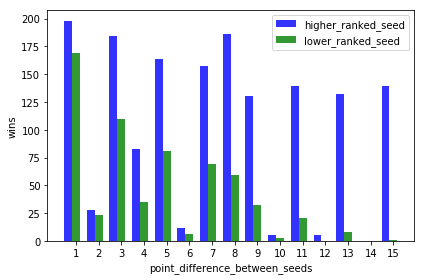

In [56]:
higher_rank_won = []
lower_rank_won =[]
for thing in list(range(1,16)):
    meh=df[(df['point_difference']== thing) & (df['result']==1)]
    higher_rank_won.append(meh.shape[0])
    meh2 =df[(df['point_difference']== thing) & (df['result']==2)]
    lower_rank_won.append(meh2.shape[0])
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 15
higher_rank_won
lower_rank_won

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, higher_rank_won, bar_width,
alpha=opacity,
color='b',
label='higher_ranked_seed')

rects2 = plt.bar(index + bar_width, lower_rank_won, bar_width,
alpha=opacity,
color='g',
label='lower_ranked_seed')

plt.xlabel('point_difference_between_seeds')
plt.ylabel('wins')
plt.xticks(index + bar_width, ('1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15'))
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
percent_better_rank_wins = []
for thing in percent_better_ranked_wins:
    try:
        percent_better_rank_wins.append(float(thing))
    except:
        percent_better_rank_wins.append(0)

In [71]:
percent_better_rank_wins

[53.950953678474114,
 54.90196078431373,
 62.585034013605444,
 70.33898305084746,
 66.93877551020408,
 66.66666666666666,
 69.46902654867256,
 75.91836734693878,
 80.24691358024691,
 62.5,
 86.875,
 100.0,
 94.28571428571428,
 0,
 99.28571428571429]

In [67]:
percent_worse_rank_wins = []
for thing in percent_worse_ranked_wins:
    try:
        percent_worse_rank_wins.append(float(thing))
    except:
        percent_worse_rank_wins.append(0)

In [68]:
percent_worse_ranked_wins

[46.049046321525886,
 45.09803921568628,
 37.41496598639456,
 29.66101694915254,
 33.06122448979592,
 33.33333333333333,
 30.53097345132743,
 24.081632653061224,
 19.753086419753085,
 37.5,
 13.125,
 0.0,
 5.714285714285714,
 None,
 0.7142857142857143]

In [69]:
percent_worse_rank_wins

[46.049046321525886,
 45.09803921568628,
 37.41496598639456,
 29.66101694915254,
 33.06122448979592,
 33.33333333333333,
 30.53097345132743,
 24.081632653061224,
 19.753086419753085,
 37.5,
 13.125,
 0.0,
 5.714285714285714,
 0,
 0.7142857142857143]

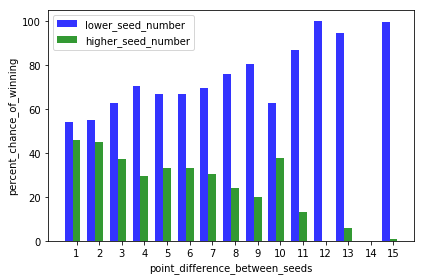

In [76]:
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, percent_better_rank_wins, bar_width,
alpha=opacity,
color='b',
label='lower_seed_number')

rects2 = plt.bar(index + bar_width, percent_worse_rank_wins, bar_width,
alpha=opacity,
color='g',
label='higher_seed_number')

plt.xlabel('point_difference_between_seeds')
plt.ylabel('percent_chance_of_winning')
plt.xticks(index + bar_width, ('1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15'))
plt.legend()

plt.tight_layout()
plt.show()

In [72]:
df.head()

,first_team,second_team,winner,point_difference,result
0,1,16,1,15,1
1,8,9,8,1,1
2,5,12,5,7,1
3,4,13,4,9,1
4,6,11,11,5,2


# Splits up round 1 data and all the other data

In [13]:
def split_data_up (df,column):
    round1 = []
    everything_except_1st_round = []
    i=0
    for thing in list(column):
        if i== 62:
            everything_except_1st_round.append(thing)
            i=0
        elif 0<=i<=7 or 15<=i<=22 or 30<=i<=37 or 45<=i<=52:
            round1.append(thing)
            i+=1
        else:
            everything_except_1st_round.append(thing)
            i+=1
    return round1,everything_except_1st_round

In [14]:
winner_round1,All_rounds_winner_except_1st_round=split_data_up (df,df['winner'])

first_team_round1,All_rounds_first_team_except_1st_round = split_data_up (df,df['first_team'])

second_team_round1,All_rounds_second_team_except_1st_round = split_data_up (df,df['second_team'])

point_difference_round1,point_difference_all_rounds_except_1st_round = split_data_up (df,df['point_difference'])

# Graphs the first rounds data and gives list of percent higher seed wins for each seed difference in a list

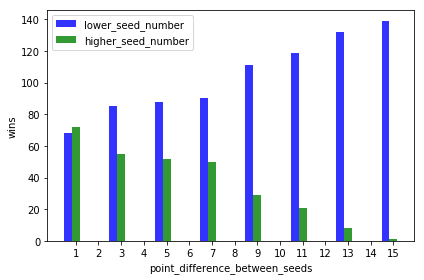

[48.57142857142857,
 None,
 60.71428571428571,
 None,
 62.857142857142854,
 None,
 64.28571428571429,
 None,
 79.28571428571428,
 None,
 85.0,
 None,
 94.28571428571428,
 None,
 99.28571428571429]

In [78]:
create_graph (first_team_round1, second_team_round1, winner_round1, point_difference_round1)
round1_percent_winner_wins=get_percentage_higher_rank_wins (first_team_round1, second_team_round1, winner_round1, point_difference_round1)
round1_percent_winner_wins

# graphs data from all rounds except 1st round and gives list of percent higher seed wins for each seed difference in a list

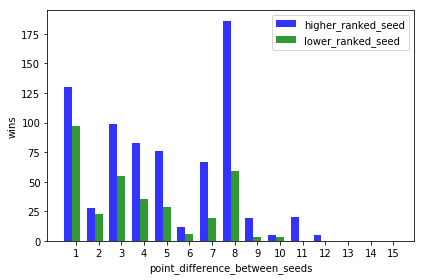

[57.268722466960355,
 54.90196078431373,
 64.28571428571429,
 70.33898305084746,
 72.38095238095238,
 66.66666666666666,
 77.90697674418605,
 75.91836734693878,
 86.36363636363636,
 62.5,
 100.0,
 100.0,
 None,
 None,
 None]

In [73]:
create_graph (All_rounds_first_team_except_1st_round,
              All_rounds_second_team_except_1st_round, 
              All_rounds_winner_except_1st_round, 
              point_difference_all_rounds_except_1st_round)
percent_winner_wins_all_rounds_except_1st_round=get_percentage_higher_rank_wins (All_rounds_first_team_except_1st_round,
                                                            All_rounds_second_team_except_1st_round, 
                                                            All_rounds_winner_except_1st_round, 
                                                            point_difference_all_rounds_except_1st_round)
percent_winner_wins_all_rounds_except_1st_round

# Splits up data by round

In [15]:
def split_all_data_up (df,column):
    round1 = []
    round2 = []
    round3 = []
    round4 = []
    final_four_first_round = []
    final_four_last_round = []
    i=0
    for thing in list(column):
        if i== 62:
            final_four_last_round.append(thing)
            i=0
        elif 0<=i<=7 or 15<=i<=22 or 30<=i<=37 or 45<=i<=52:
            round1.append(thing)
            i+=1
        elif 8<=i<=11 or 23<=i<=26 or 38<=i<=41 or 53<=i<=56:
            round2.append(thing)
            i+=1
        elif 12<=i<=13 or 27<=i<=28 or 42<=i<=43 or 57<=i<=58:
            round3.append(thing)
            i+=1
        elif i==14 or i==29 or i==44 or i==59:
            round4.append(thing)
            i+=1
        elif i == 60 or i == 61:
            final_four_first_round.append(thing)
            i+=1
    return round1,round2,round3,round4,final_four_first_round,final_four_last_round



In [16]:
winner_round1,winner_round2,winner_round3,winner_round4,winner_final_four_first_round,winner_final_four_last_round=split_all_data_up (df,df['winner'])

first_team_round1,first_team_round2,first_team_round3,first_team_round4,first_team_final_four_first_round,first_team_final_four_last_round = split_all_data_up (df,df['first_team'])

second_team_round1,second_team_round2,second_team_round3,second_team_round4,second_team_final_four_first_round,second_team_final_four_last_round = split_all_data_up (df,df['second_team'])

point_difference_round1,point_difference_round2,point_difference_round3,point_difference_round4,point_difference_final_four_first_round,point_difference_final_four_last_round = split_all_data_up (df,df['point_difference'])

# Exploratory data analysis

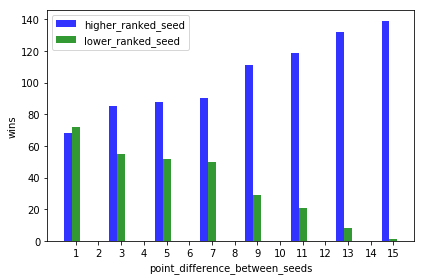

[48.57142857142857,
 None,
 60.71428571428571,
 None,
 62.857142857142854,
 None,
 64.28571428571429,
 None,
 79.28571428571428,
 None,
 85.0,
 None,
 94.28571428571428,
 None,
 99.28571428571429]

In [17]:
create_graph (first_team_round1,
              second_team_round1, 
              winner_round1, 
              point_difference_round1)
percentages_first_round=get_percentage_higher_rank_wins (first_team_round1,second_team_round1, winner_round1, point_difference_round1)
percentages_first_round

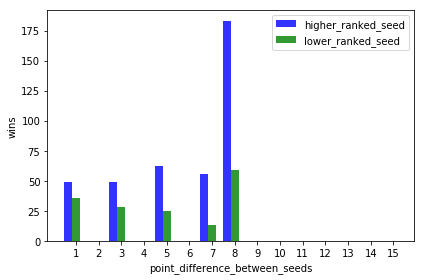

[57.647058823529406,
 None,
 63.63636363636363,
 None,
 71.26436781609196,
 None,
 81.15942028985508,
 75.6198347107438,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
create_graph (first_team_round2,
              second_team_round2, 
              winner_round2, 
              point_difference_round2)
percentages_second_round=get_percentage_higher_rank_wins (first_team_round2,second_team_round2, winner_round2, point_difference_round2)
percentages_second_round

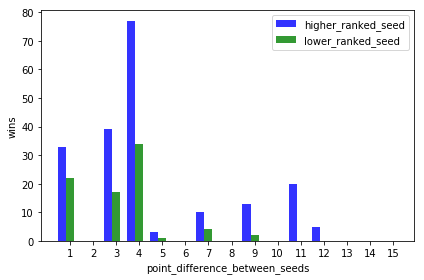

[60.0,
 None,
 69.64285714285714,
 69.36936936936937,
 75.0,
 None,
 71.42857142857143,
 None,
 86.66666666666667,
 None,
 100.0,
 100.0,
 None,
 None,
 None]

In [18]:
create_graph (first_team_round3,
              second_team_round3, 
              winner_round3, 
              point_difference_round3)
percentages_third_round=get_percentage_higher_rank_wins (first_team_round3,second_team_round3, winner_round3, point_difference_round3)
percentages_third_round

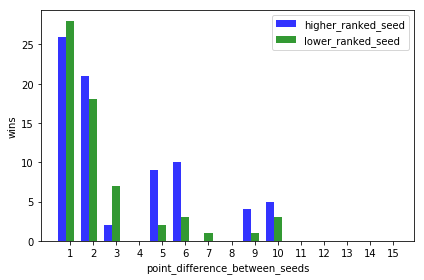

[48.148148148148145,
 53.84615384615385,
 22.22222222222222,
 None,
 81.81818181818183,
 76.92307692307693,
 0.0,
 None,
 80.0,
 62.5,
 None,
 None,
 None,
 None,
 None]

In [19]:
create_graph (first_team_round4,
              second_team_round4, 
              winner_round4, 
              point_difference_round4)
percentages_fourth_round=get_percentage_higher_rank_wins (first_team_round4,second_team_round4, winner_round4, point_difference_round4)
percentages_fourth_round

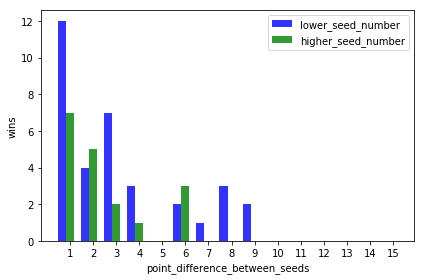

[63.1578947368421,
 44.44444444444444,
 77.77777777777779,
 75.0,
 None,
 40.0,
 100.0,
 100.0,
 100.0,
 None,
 None,
 None,
 None,
 None,
 None]

In [79]:
create_graph (first_team_final_four_first_round,
              second_team_final_four_first_round, 
              winner_final_four_first_round, 
              point_difference_final_four_first_round)
percentages_final_four_first_round=get_percentage_higher_rank_wins (first_team_final_four_first_round,second_team_final_four_first_round, winner_final_four_first_round, point_difference_final_four_first_round)
percentages_final_four_first_round

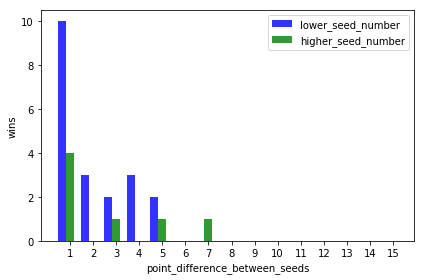

[71.42857142857143,
 100.0,
 66.66666666666666,
 100.0,
 66.66666666666666,
 None,
 0.0,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [80]:
create_graph (first_team_final_four_last_round,
              second_team_final_four_last_round, 
              winner_final_four_last_round, 
              point_difference_final_four_last_round)
percentages_final_four_last_round=get_percentage_higher_rank_wins (first_team_final_four_last_round,second_team_final_four_last_round, winner_final_four_last_round, point_difference_final_four_last_round)
percentages_final_four_last_round

# Making graphs

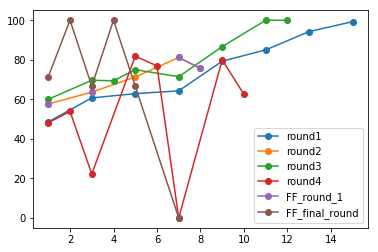

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,16)
series1 = np.array(percentages_first_round).astype(np.double)
s1mask = np.isfinite(series1)

series2 = np.array(percentages_second_round).astype(np.double)
s2mask = np.isfinite(series2)

series3 = np.array(percentages_third_round).astype(np.double)
s3mask = np.isfinite(series3)

series4 = np.array(percentages_fourth_round).astype(np.double)
s4mask = np.isfinite(series4)

series5 = np.array(percentages_final_four_first_round).astype(np.double)
s5mask = np.isfinite(series5)

series6 = np.array(percentages_final_four_last_round).astype(np.double)
s6mask = np.isfinite(series6)

round1=plt.plot(x[s1mask], series1[s1mask], linestyle='-', marker='o', label = 'round1')
round2=plt.plot(x[s2mask], series2[s2mask], linestyle='-', marker='o', label = 'round2')
round3=plt.plot(x[s3mask], series3[s3mask], linestyle='-', marker='o', label = 'round3')
round4=plt.plot(x[s4mask], series4[s4mask], linestyle='-', marker='o', label = 'round4')
FF_round_1=plt.plot(x[s5mask], series2[s5mask], linestyle='-', marker='o', label = 'FF_round_1')
FF_final_round=plt.plot(x[s6mask], series6[s6mask], linestyle='-', marker='o', label = 'FF_final_round')

plt.legend(loc="lower right")


plt.show()

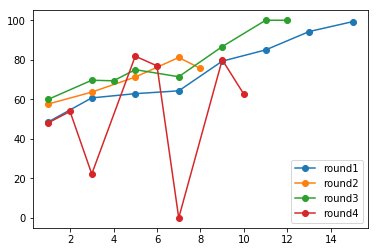

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,16)
series1 = np.array(percentages_first_round).astype(np.double)
s1mask = np.isfinite(series1)

series2 = np.array(percentages_second_round).astype(np.double)
s2mask = np.isfinite(series2)

series3 = np.array(percentages_third_round).astype(np.double)
s3mask = np.isfinite(series3)

series4 = np.array(percentages_fourth_round).astype(np.double)
s4mask = np.isfinite(series4)

round1=plt.plot(x[s1mask], series1[s1mask], linestyle='-', marker='o', label = 'round1')
round2=plt.plot(x[s2mask], series2[s2mask], linestyle='-', marker='o', label = 'round2')
round3=plt.plot(x[s3mask], series3[s3mask], linestyle='-', marker='o', label = 'round3')
round4=plt.plot(x[s4mask], series4[s4mask], linestyle='-', marker='o', label = 'round4')

plt.legend(loc="lower right")


plt.show()


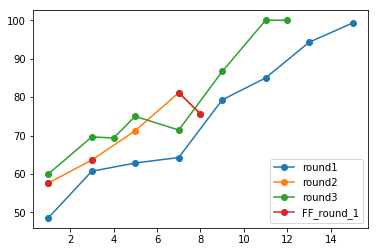

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,16)
series1 = np.array(percentages_first_round).astype(np.double)
s1mask = np.isfinite(series1)

series2 = np.array(percentages_second_round).astype(np.double)
s2mask = np.isfinite(series2)

series3 = np.array(percentages_third_round).astype(np.double)
s3mask = np.isfinite(series3)


series5 = np.array(percentages_final_four_first_round).astype(np.double)
s5mask = np.isfinite(series5)


round1=plt.plot(x[s1mask], series1[s1mask], linestyle='-', marker='o', label = 'round1')
round2=plt.plot(x[s2mask], series2[s2mask], linestyle='-', marker='o', label = 'round2')
round3=plt.plot(x[s3mask], series3[s3mask], linestyle='-', marker='o', label = 'round3')
FF_round_1=plt.plot(x[s5mask], series2[s5mask], linestyle='-', marker='o', label = 'FF_round_1')

plt.legend(loc="lower right")


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,16)
series1 = np.array(percentages_first_round).astype(np.double)
s1mask = np.isfinite(series1)

series2 = np.array(percentages_second_round).astype(np.double)
s2mask = np.isfinite(series2)

series3 = np.array(percentages_third_round).astype(np.double)
s3mask = np.isfinite(series3)


series5 = np.array(percentages_final_four_first_round).astype(np.double)
s5mask = np.isfinite(series5)


round1=plt.plot(x[s1mask], series1[s1mask], linestyle='-', marker='o', label = 'round1')
round2=plt.plot(x[s2mask], series2[s2mask], linestyle='-', marker='o', label = 'round2')
round3=plt.plot(x[s3mask], series3[s3mask], linestyle='-', marker='o', label = 'round3')
FF_round_1=plt.plot(x[s5mask], series2[s5mask], linestyle='-', marker='o', label = 'FF_round_1')

plt.legend(loc="lower right")


plt.show()

In [ ]:
#predicting march madness game winners based on seed differences